# Benchmark standard gates

In [1]:
import GenStateChain as GSC
import numpy as np
from matplotlib import pyplot as plt

In [2]:
GSC.set_n([3,3])

In [3]:
def CreateDrivenRydHamiltonian(coords, omega, delta, C6, EHFS, site_idxs, atom_types = None):
    # Create the Rabi drive term and detuning term
    H = GSC.Operators.zero()
    
    for elem in site_idxs:
        H = H + omega / 2 * GSC.Operators.sigmax([elem], [[1,2]]) - delta * GSC.Operators.proj(GSC.create_state_list([elem],2)) + \
            omega / 2 * GSC.Operators.sigmax([elem], [[0,2]]) - EHFS * GSC.Operators.proj(GSC.create_state_list([elem], 0))  # The delta multiplies a projector of state 1 on site i
    
    # Lastly we add the interaction term. Here we use an operator from the library.
    states = 2 # The interacting state is state 1. 
    H = H + GSC.Operators.PairInteraction(coords, C6, states, atom_types=atom_types)
    return H


def OrigRydCZGate(coords, omegas, deltas, C6, EHFS):
    def func(init_state):
        HRyd0 = CreateDrivenRydHamiltonian(coords, omegas[0], deltas[0], C6, EHFS[0], [0])
        result = GSC.Dynamics.Unitary(HRyd0, init_state, np.pi/omegas[0], 500) # pick tend so it's a pi pulse
        HRyd1 = CreateDrivenRydHamiltonian(coords, omegas[1], deltas[1], C6, EHFS[1], [1])
        result = GSC.Dynamics.Unitary(HRyd1, result.final_state, 2 * np.pi/omegas[1], 500) # pick tend so it's a 2 pi pulse
        result = GSC.Dynamics.Unitary(HRyd0, result.final_state, np.pi/omegas[0], 500) # pi pulse back on the original atom.
        return result.final_state
    return func

gate = GSC.Operators.cGate([1,-2], GSC.Operators.sigmaz([1], [[0,1]], bSingle = 1))
gate = GSC.Operators.sigmaz([0,1], [[0,1], [0,1]]) * gate

In [16]:
coords = [[0,0], [1,0]]
omegas = [2 * np.pi, 2 * np.pi]
deltas = [0,0]
EHFS = [-2 * np.pi * 1772, -2 * np.pi * 9192]

fidelities = []
C6s = np.linspace(100, 1000, 20)
for C6 in C6s:
    print('calculating ' + str(C6))
    func = OrigRydCZGate(coords, omegas, deltas, C6, EHFS)
    fidelity, op, target_op = GSC.CalculateFidelity(func, gate, states = [[0,1], [0,1]])
    fidelities.append(abs(fidelity))


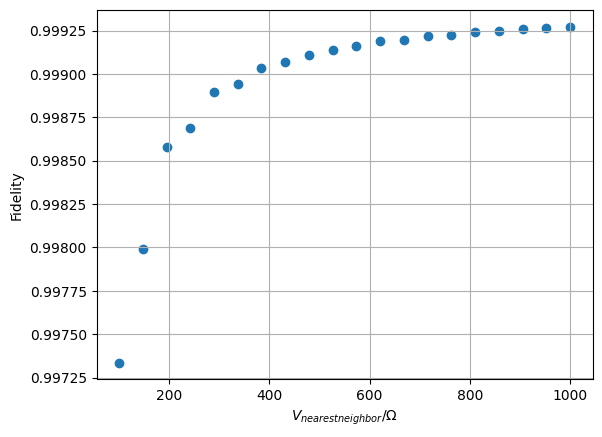

In [17]:
from matplotlib import pyplot as plt
plt.scatter(C6s, np.array(fidelities))
plt.xlabel('$V_{nearest neighbor}$/$\Omega$')
plt.ylabel('Fidelity')
plt.grid()

# Benchmark 1 Na and 2 Cs gates

In [4]:
GSC.set_n([3,3,3])

In [5]:
def ZZReadout(coords, omegas, deltas, C6, EHFS):
    def func(init_state):
        HRyd0 = CreateDrivenRydHamiltonian(coords, omegas[0], deltas[0], C6, EHFS[0], [1], atom_types = [0,1,0])
        result = GSC.Dynamics.Unitary(HRyd0, init_state, np.pi/omegas[0], 500) # pick tend so it's a pi pulse
        HRyd1 = CreateDrivenRydHamiltonian(coords, omegas[1], deltas[1], C6, EHFS[1], [0,2], atom_types = [0,1,0])
        result = GSC.Dynamics.Unitary(HRyd1, result.final_state, 2 * np.pi/omegas[1], 500) # pick tend so it's a 2 pi pulse
        result = GSC.Dynamics.Unitary(HRyd0, result.final_state, np.pi/omegas[0], 500) # pi pulse back on the original atom.
        return result.final_state
    return func

ZSingle = GSC.Operators.sigmaz([0], [[0,1]], bSingle=1)
proj0 = GSC.Operators.projOnSite(1, 0)
proj1 = GSC.Operators.projOnSite(1, 1)
gate2 = GSC.Operators.specify([ZSingle, proj0, ZSingle]) + GSC.Operators.specify([-1, proj1, 1])

In [20]:
coords = [[0,0], [1,0], [2,0]]
omegas = [2 * np.pi, 2 * np.pi]
deltas = [0,0]
EHFS = [-2 * np.pi * 1772, -2 * np.pi * 9192]

fidelities = []
C6 = [[0,1000],[0]]
#for C6 in C6s:
#    print('calculating ' + str(C6))
func = ZZReadout(coords, omegas, deltas, C6, EHFS)
fidelity, op, target_op = GSC.CalculateFidelity(func, gate2, states = [[0,1], [1], [0,1]])
fidelities.append(abs(fidelity))

In [21]:
fidelities

[0.92702249060935]

In [24]:
op

Quantum object: dims = [[3, 3, 3], [3, 3, 3]], shape = (27, 27), type = oper, isherm = False
Qobj data =
[[ 6.45265898e-07+5.02871610e-06j  1.49045330e-11-2.59265650e-11j
   1.49045271e-11-2.59265693e-11j  8.35545199e-08+3.31390372e-08j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j]
 [

In [65]:
coords = [[0,0], [1,0], [2,0]]
omegas = [2 * np.pi, 2 * np.pi]
deltas = [0,0]
C6 = [[0, 100], [0]]
EHFS = [- 2* np.pi * 1772, - 2 * np.pi * 5000]

init_state = GSC.States.specify([0,1,0])

HRyd0 = CreateDrivenRydHamiltonian(coords, omegas[0], deltas[0], C6, EHFS[0], [1], atom_types = [0,1,0])
result = GSC.Dynamics.Unitary(HRyd0, init_state, np.pi/omegas[0], 500) # pick tend so it's a pi pulse
HRyd1 = CreateDrivenRydHamiltonian(coords, omegas[1], deltas[1], C6, EHFS[1], [0,2], atom_types = [0,1,0])
result = GSC.Dynamics.Unitary(HRyd1, result.final_state, 2 * np.pi/omegas[1], 500) # pick tend so it's a 2 pi pulse

In [66]:
GSC.States.specify([0,2,0]).dag() * result.final_state

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-0.48893442-0.87232041j]]

In [41]:
HRyd1

Quantum object: dims = [[3, 3, 3], [3, 3, 3]], shape = (27, 27), type = oper, isherm = True
Qobj data =
[[1.15510079e+05 0.00000000e+00 3.14159265e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.14159265e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.77550393e+04 3.14159265e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.14159265e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.14159265e+00 3.14159265e+00 5.77550393e+04 0.0000000

In [43]:
GSC.States.specify([0,2,0]).dag() * HRyd1 * GSC.States.specify([0,2,0])

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[115510.07868719]]

In [44]:
-9192 * 2 * 2 * np.pi

-115510.07868718951

In [45]:
0.821**2 + 0.571**2

1.000082

In [62]:
0.5**2 + 0.866**2

0.999956